In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("delay2.csv")

In [3]:
df.head()

,station,week,month,month_3,month_6,year,train_number
0,BHUSAVAL JN (BSL),0,0,0,0,0,1135
1,JALGAON JN (JL),0,0,0,10,9,1135
2,CHALISGAON JN (CSN),0,0,0,30,29,1135
3,MANMAD JN (MMR),0,0,0,22,24,1135
4,KOPARGAON (KPG),0,0,0,18,18,1135


In [4]:
import re

In [5]:
exp = re.compile("\((?P<code>[A-Za-z]*)\)")

In [6]:
df["station_code"] = df["station"].apply(lambda x: exp.search(x).group("code"))

In [7]:
df.head()

,station,week,month,month_3,month_6,year,train_number,station_code
0,BHUSAVAL JN (BSL),0,0,0,0,0,1135,BSL
1,JALGAON JN (JL),0,0,0,10,9,1135,JL
2,CHALISGAON JN (CSN),0,0,0,30,29,1135,CSN
3,MANMAD JN (MMR),0,0,0,22,24,1135,MMR
4,KOPARGAON (KPG),0,0,0,18,18,1135,KPG


In [8]:
train = pd.read_csv("webapp/data.csv")

In [9]:
accepted = set()
for tn in train["number"]:
    try:
        accepted.add(int(tn))
    except:
        pass

In [10]:
len(accepted)

4384

In [11]:
matched = set()
for tn in df["train_number"]:
    if tn in accepted:
        matched.add(tn)

In [12]:
len(matched)

1284

In [13]:
data = df[df["train_number"].isin(matched)].copy()

In [14]:
data.shape

(27529, 8)

In [15]:
len(np.unique(data["train_number"]))

1284

In [16]:
data.to_csv("final_delay2.csv", index=False)

In [17]:
matched_str = set(map(str, matched))

In [18]:
tr_data = train[train["number"].isin(matched_str)]

In [19]:
tr_data.shape

(1269, 20)

In [20]:
len(matched_str)

1284

In [21]:
matched_str.difference(set(np.unique(tr_data["number"])))

{'4604',
 '6009',
 '6010',
 '6535',
 '6536',
 '6617',
 '6618',
 '9051',
 '9621',
 '9622',
 '9715',
 '9721',
 '9722',
 '9723',
 '9724'}

In [22]:
tr_data.to_csv("tr_data2.csv", index=False)

In [23]:
new_tr_data = pd.read_csv("tr_data2.csv")

In [24]:
new_tr_data.dtypes

third_ac               int64
arrival               object
from_station_code     object
name                  object
zone                  object
chair_car              int64
first_class            int64
sleeper                int64
from_station_name     object
number                 int64
departure             object
return_train          object
to_station_code       object
second_ac              int64
classes              float64
to_station_name       object
type                  object
first_ac               int64
distance             float64
duration             float64
dtype: object

In [25]:
new_delay = pd.read_csv("final_delay2.csv")

In [26]:
new_delay.dtypes

station         object
week             int64
month            int64
month_3          int64
month_6          int64
year             int64
train_number     int64
station_code    object
dtype: object

In [27]:
from sklearn.cluster import KMeans

In [28]:
from sklearn.model_selection import GridSearchCV

In [45]:
df2 = (
    new_delay[["station_code", "week", "month", "month_3", "month_6", "year"]]
    .groupby("station_code")
    .mean()
)

In [46]:
df2.head()

,week,month,month_3,month_6,year
station_code,,,,,
AAL,83.7,90.2,122.100000,126.3,112.100000
AAM,9.0,15.0,14.000000,13.0,12.000000
AAR,17.0,23.0,25.666667,35.0,36.333333
AB,13.5,15.2,18.600000,18.5,18.500000
ABD,75.0,38.0,29.000000,30.0,36.000000


In [47]:
X = df2[["month", "month_3", "month_6", "year"]]

In [48]:
X.describe()

,month,month_3,month_6,year
count,2352.000000,2352.000000,2352.000000,2352.000000
mean,42.781646,47.433958,47.526760,42.636215
std,30.359772,32.408095,32.739149,28.418190
min,0.000000,0.000000,0.000000,0.000000
25%,19.746462,22.500000,22.854396,21.000000
50%,36.591667,40.708333,40.961538,36.500000
75%,57.875000,65.000000,63.882653,57.250000
max,248.000000,242.500000,238.000000,195.750000


In [49]:
inertia_values = []
n_clusters = 23
for i in range(3, n_clusters + 1, 2):
    km = KMeans(n_clusters=i, n_init="auto", algorithm="lloyd")
    km.fit_predict(X)
    inertia_values.append(km.inertia_)

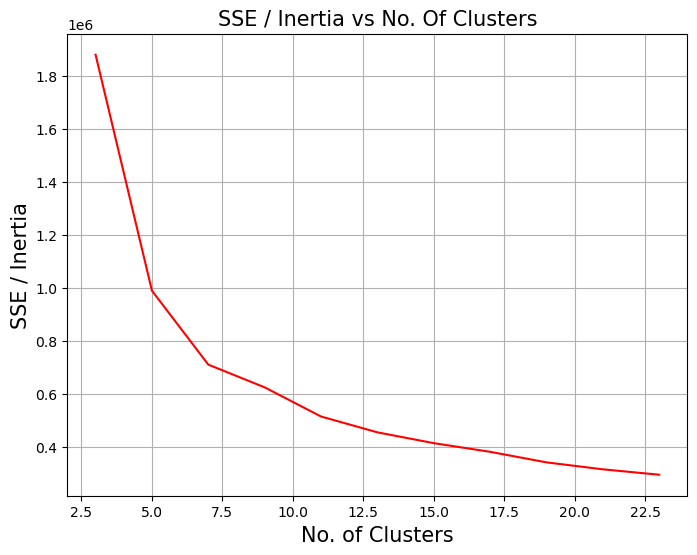

In [50]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(3, n_clusters + 1, 2), inertia_values, color="red")
plt.xlabel("No. of Clusters", fontsize=15)
plt.ylabel("SSE / Inertia", fontsize=15)
plt.title("SSE / Inertia vs No. Of Clusters", fontsize=15)
plt.grid()
plt.show()

In [51]:
n_clusters = 11

In [52]:
km = KMeans(n_clusters=n_clusters, n_init="auto", algorithm="lloyd")

In [53]:
km.fit_predict(X)

array([9, 3, 1, ..., 8, 2, 3])

In [54]:
labels = km.labels_

In [55]:
len(labels), len(X)

(2352, 2352)

In [56]:
X["delay_level"] = labels

In [57]:
X.head()

,month,month_3,month_6,year,delay_level
station_code,,,,,
AAL,90.2,122.100000,126.3,112.100000,9
AAM,15.0,14.000000,13.0,12.000000,3
AAR,23.0,25.666667,35.0,36.333333,1
AB,15.2,18.600000,18.5,18.500000,3
ABD,38.0,29.000000,30.0,36.000000,1


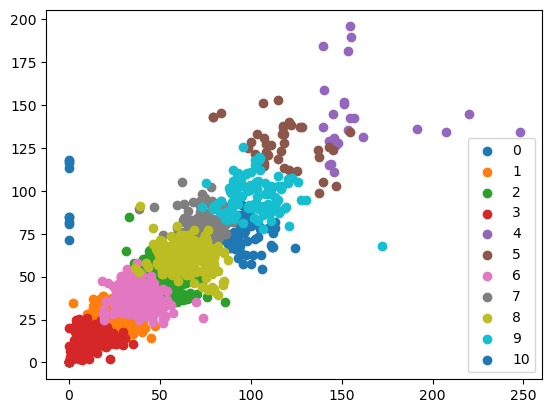

In [58]:
# Getting unique labels

u_labels = np.unique(labels)

# plotting the results:

for i in u_labels:
    plt.scatter(
        X[X["delay_level"] == i]["month"], X[X["delay_level"] == i]["year"], label=i
    )
plt.legend()
plt.show()

In [59]:
import joblib

In [60]:
joblib.dump(km, "km_s2.sav")

['km_s2.sav']

In [61]:
km = joblib.load("km2.sav")

In [62]:
km_s = joblib.load("km_s2.sav")

In [63]:
delay = pd.read_csv("final_delay2.csv")

In [64]:
train = pd.read_csv("tr_data2.csv")

In [65]:
delay.shape

(27529, 8)

In [66]:
delay.head()

,station,week,month,month_3,month_6,year,train_number,station_code
0,FIROZPUR CANT (FZR),0,1,2,2,2,4604,FZR
1,KASU BEGU (KBU),1,2,3,4,4,4604,KBU
2,GOLEHWALA (GHA),6,6,5,5,6,4604,GHA
3,PIPLI PAKHI KALAN (PKZ),6,6,5,5,6,4604,PKZ
4,FARIDKOT (FDK),6,6,6,6,7,4604,FDK


In [67]:
train.head()

,third_ac,arrival,from_station_code,name,zone,chair_car,first_class,sleeper,from_station_name,number,departure,return_train,to_station_code,second_ac,classes,to_station_name,type,first_ac,distance,duration
0,0,12:05:00,MMR,Manmad Pune Express(Via Nasik),CR,1,0,0,MANMAD JN,11025,04:30:00,11026,PUNE,0,NaN,PUNE JN,Exp,0,364.0,7.583333
1,0,21:30:00,PUNE,Pune Manmad Express,CR,1,0,0,PUNE JN,11026,12:50:00,11025,MMR,0,NaN,MANMAD JN,Exp,0,364.0,8.666667
2,1,04:55:00,CSTM,Mumbai CST-Chennai Mail,CR,0,0,1,MUMBAI CST,11027,23:45:00,11028,MAS,1,NaN,CHENNAI CENTRAL,Mail,0,1283.0,29.166667
3,0,20:25:00,CSTM,Koyna Express,CR,1,0,0,MUMBAI CST,11029,08:40:00,11030,KOP,0,NaN,C SHAHU M RAJ KOLHAPUR TERM,Exp,0,518.0,11.750000
4,0,20:22:00,KOP,Koyna Express,CR,1,0,0,C SHAHU M RAJ KOLHAPUR TERM,11030,07:55:00,11029,CSTM,0,NaN,MUMBAI CST,Exp,0,518.0,12.450000


In [68]:
new_df = delay.merge(train, left_on="train_number", right_on="number")

In [69]:
new_df.head()

,station,week,month,month_3,month_6,year,train_number,station_code,third_ac,arrival,...,departure,return_train,to_station_code,second_ac,classes,to_station_name,type,first_ac,distance,duration
0,C SHIVAJI TERM MUMBAI (CSMT),12,7,14,20,16,10103,CSMT,1,18:45:00,...,06:55:00,10104,MAO,1,NaN,MADGAON,Exp,1,765.0,11.833333
1,DADAR (DR),17,14,20,25,19,10103,DR,1,18:45:00,...,06:55:00,10104,MAO,1,NaN,MADGAON,Exp,1,765.0,11.833333
2,THANE (TNA),15,12,19,24,18,10103,TNA,1,18:45:00,...,06:55:00,10104,MAO,1,NaN,MADGAON,Exp,1,765.0,11.833333
3,PANVEL (PNVL),23,20,28,35,27,10103,PNVL,1,18:45:00,...,06:55:00,10104,MAO,1,NaN,MADGAON,Exp,1,765.0,11.833333
4,MANGAON (MNI),6,8,16,23,16,10103,MNI,1,18:45:00,...,06:55:00,10104,MAO,1,NaN,MADGAON,Exp,1,765.0,11.833333


In [70]:
new_df.shape

(27320, 28)

In [71]:
new_df.columns

Index(['station', 'week', 'month', 'month_3', 'month_6', 'year',
       'train_number', 'station_code', 'third_ac', 'arrival',
       'from_station_code', 'name', 'zone', 'chair_car', 'first_class',
       'sleeper', 'from_station_name', 'number', 'departure', 'return_train',
       'to_station_code', 'second_ac', 'classes', 'to_station_name', 'type',
       'first_ac', 'distance', 'duration'],
      dtype='object')

In [72]:
data = new_df[
    [
        "train_number",
        "station_code",
        "third_ac",
        "zone",
        "chair_car",
        "first_class",
        "sleeper",
        "second_ac",
        "type",
        "first_ac",
        "distance",
        "duration",
        "month",
        "month_3",
        "month_6",
        "year",
        "week",
    ]
]

In [73]:
data.head()

,train_number,station_code,third_ac,zone,chair_car,first_class,sleeper,second_ac,type,first_ac,distance,duration,month,month_3,month_6,year,week
0,10103,CSMT,1,KR,0,0,1,1,Exp,1,765.0,11.833333,7,14,20,16,12
1,10103,DR,1,KR,0,0,1,1,Exp,1,765.0,11.833333,14,20,25,19,17
2,10103,TNA,1,KR,0,0,1,1,Exp,1,765.0,11.833333,12,19,24,18,15
3,10103,PNVL,1,KR,0,0,1,1,Exp,1,765.0,11.833333,20,28,35,27,23
4,10103,MNI,1,KR,0,0,1,1,Exp,1,765.0,11.833333,8,16,23,16,6


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27320 entries, 0 to 27319
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   train_number  27320 non-null  int64  
 1   station_code  27320 non-null  object 
 2   third_ac      27320 non-null  int64  
 3   zone          27320 non-null  object 
 4   chair_car     27320 non-null  int64  
 5   first_class   27320 non-null  int64  
 6   sleeper       27320 non-null  int64  
 7   second_ac     27320 non-null  int64  
 8   type          27320 non-null  object 
 9   first_ac      27320 non-null  int64  
 10  distance      27320 non-null  float64
 11  duration      27320 non-null  float64
 12  month         27320 non-null  int64  
 13  month_3       27320 non-null  int64  
 14  month_6       27320 non-null  int64  
 15  year          27320 non-null  int64  
 16  week          27320 non-null  int64  
dtypes: float64(2), int64(12), object(3)
memory usage: 3.8+ MB


In [75]:
temp_data = (
    data[["train_number", "month", "month_3", "month_6", "year"]]
    .groupby("train_number")
    .mean()
)

temp_data

lb = km.predict(temp_data)

temp_data["train_delay_level"] = lb

data = data.merge(
    temp_data[["train_delay_level"]], left_on="train_number", right_on="train_number"
)

In [76]:
temp_data = (
    data[["station_code", "month", "month_3", "month_6", "year"]]
    .groupby("station_code")
    .mean()
)

lb = km_s.predict(temp_data)

temp_data["station_delay_level"] = lb

data = data.merge(
    temp_data[["station_delay_level"]], left_on="station_code", right_on="station_code"
)

In [77]:
data.head()

,train_number,station_code,third_ac,zone,chair_car,first_class,sleeper,second_ac,type,first_ac,distance,duration,month,month_3,month_6,year,week,train_delay_level,station_delay_level
0,10103,CSMT,1,KR,0,0,1,1,Exp,1,765.0,11.833333,7,14,20,16,12,4,1
1,10104,CSMT,1,KR,0,0,1,1,Exp,1,765.0,12.000000,10,14,16,17,12,2,1
2,11007,CSMT,0,CR,1,0,0,0,Exp,0,192.0,4.000000,1,1,1,3,1,0,1
3,11008,CSMT,0,CR,1,0,0,0,Exp,0,192.0,4.166667,13,15,16,13,9,0,1
4,11009,CSMT,0,CR,1,0,0,0,Exp,0,192.0,4.166667,1,1,1,2,0,0,1


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27320 entries, 0 to 27319
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   train_number         27320 non-null  int64  
 1   station_code         27320 non-null  object 
 2   third_ac             27320 non-null  int64  
 3   zone                 27320 non-null  object 
 4   chair_car            27320 non-null  int64  
 5   first_class          27320 non-null  int64  
 6   sleeper              27320 non-null  int64  
 7   second_ac            27320 non-null  int64  
 8   type                 27320 non-null  object 
 9   first_ac             27320 non-null  int64  
 10  distance             27320 non-null  float64
 11  duration             27320 non-null  float64
 12  month                27320 non-null  int64  
 13  month_3              27320 non-null  int64  
 14  month_6              27320 non-null  int64  
 15  year                 27320 non-null 

In [79]:
data.describe()

,train_number,third_ac,chair_car,first_class,sleeper,second_ac,first_ac,distance,duration,month,month_3,month_6,year,week,train_delay_level,station_delay_level
count,27320.000000,27320.000000,27320.000000,27320.000000,27320.000000,27320.000000,27320.000000,27320.000000,27320.000000,27320.000000,27320.000000,27320.000000,27320.000000,27320.000000,27320.000000,27320.000000
mean,14588.040300,0.817972,0.152672,0.026171,0.798719,0.720168,0.180234,1246.997840,24.052784,48.866581,55.038946,55.407613,48.759114,44.117130,3.097108,4.506259
std,3455.335282,0.385875,0.359678,0.159647,0.400965,0.448925,0.384389,776.234669,14.343989,59.711469,62.389282,67.343295,54.254110,67.681416,2.808891,2.896894
min,10103.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000,1.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12610.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,605.000000,12.500000,12.000000,15.000000,16.000000,16.000000,8.000000,0.000000,2.000000
50%,13246.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1106.000000,22.250000,27.000000,33.000000,33.000000,30.000000,22.000000,2.000000,6.000000
75%,16336.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1804.000000,33.500000,60.000000,70.000000,69.000000,61.000000,51.000000,4.000000,7.000000
max,52556.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3552.000000,68.500000,676.000000,626.000000,4113.000000,2036.000000,1093.000000,10.000000,10.000000


In [80]:
data.columns

Index(['train_number', 'station_code', 'third_ac', 'zone', 'chair_car',
       'first_class', 'sleeper', 'second_ac', 'type', 'first_ac', 'distance',
       'duration', 'month', 'month_3', 'month_6', 'year', 'week',
       'train_delay_level', 'station_delay_level'],
      dtype='object')

In [81]:
data.to_csv("analyis2.csv", index=False)